# CodSoft Task 3                                                                                                           (Customer Churn Prediction)                                                                                    
### To develop and predict the model using customer choices based on their subscriptions from Kaggle Dataset by implementing various machine learning techniques.


Step 1: Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Step 2: Reading and sorting(filtering) the dataset

Dataset Link: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

In [4]:
dataset=pd.read_csv("C://Users//ABDUL SAMAD//Downloads//archive//Churn_Modelling.csv")

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
dataset.shape

(10000, 14)

In [10]:
dataset['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [11]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
dataset['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

In [13]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
dataset.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
dataset.pop('RowNumber')

0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: RowNumber, Length: 10000, dtype: int64

In [16]:
dataset.pop('CustomerId')

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

In [17]:
dataset.pop('Surname')

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

In [18]:
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Step 3: Analysing through Visualization with various variables

In [19]:
features_var=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']

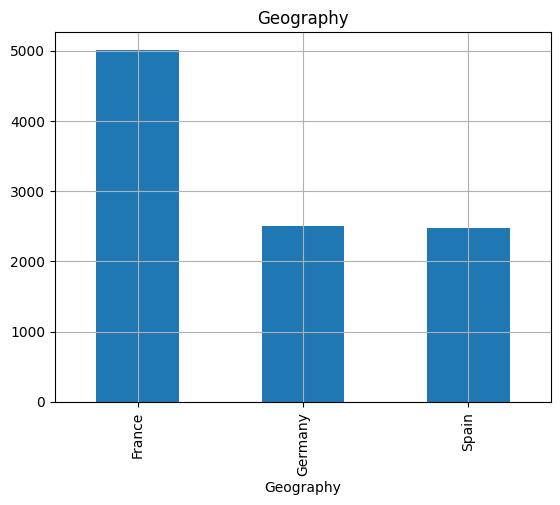

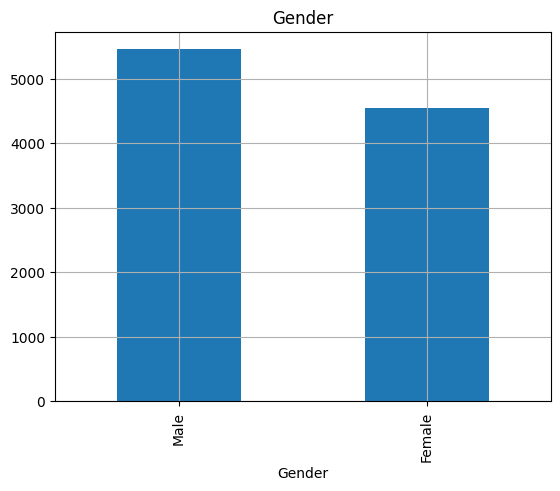

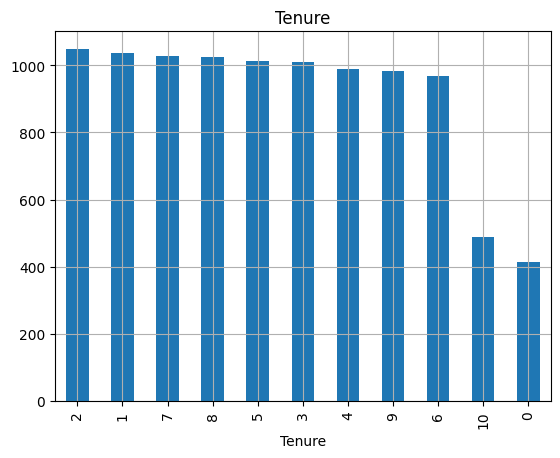

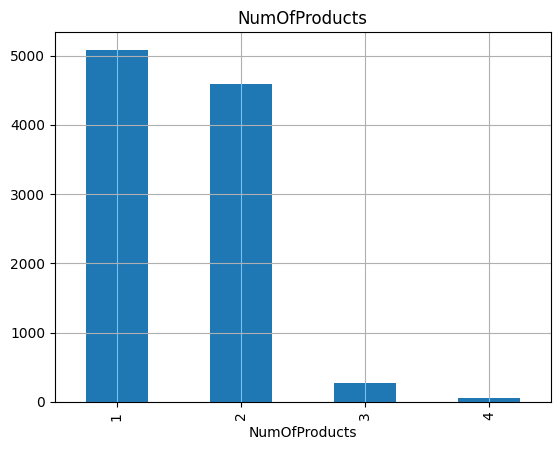

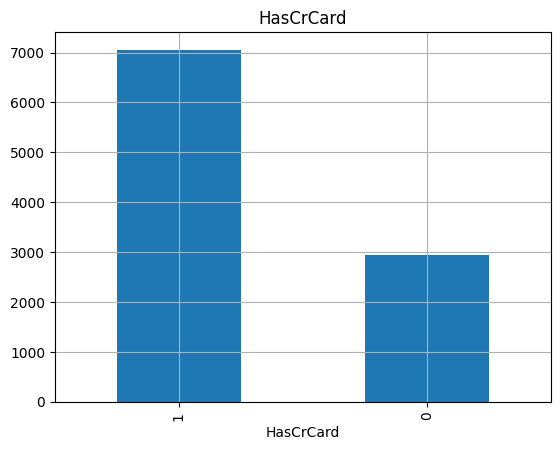

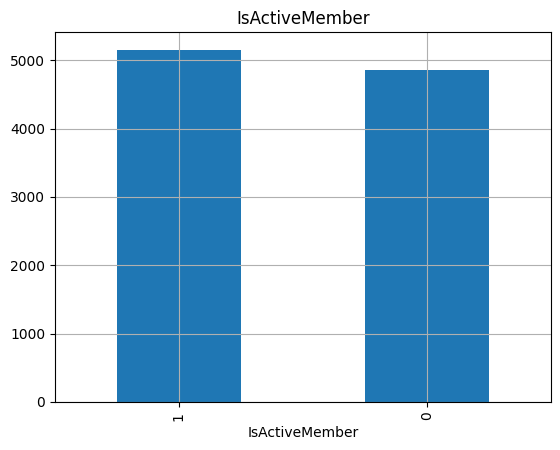

In [20]:
for f in features_var:
    dataset[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

In [21]:
y=dataset['HasCrCard']
x=dataset['NumOfProducts']

C:\Users\ABDUL SAMAD\AppData\Local\Temp\ipykernel_11580\1967975967.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['IsActiveMember'])


<Axes: xlabel='IsActiveMember', ylabel='Density'>

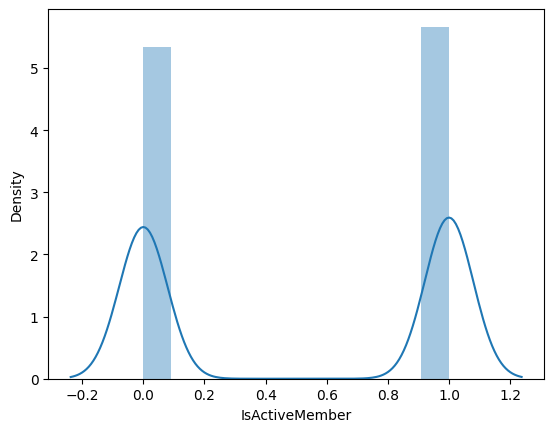

In [22]:
sns.distplot(dataset['IsActiveMember'])

In [23]:
y=dataset['IsActiveMember']
x=dataset['HasCrCard']

C:\Users\ABDUL SAMAD\AppData\Local\Temp\ipykernel_11580\1967975967.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['IsActiveMember'])


<Axes: xlabel='IsActiveMember', ylabel='Density'>

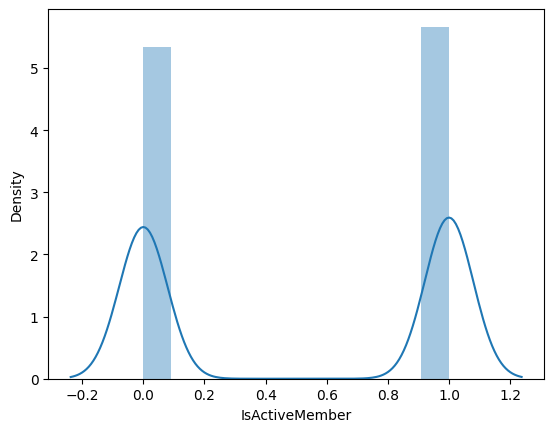

In [24]:
sns.distplot(dataset['IsActiveMember'])

Step 5:Visualization with continous variables

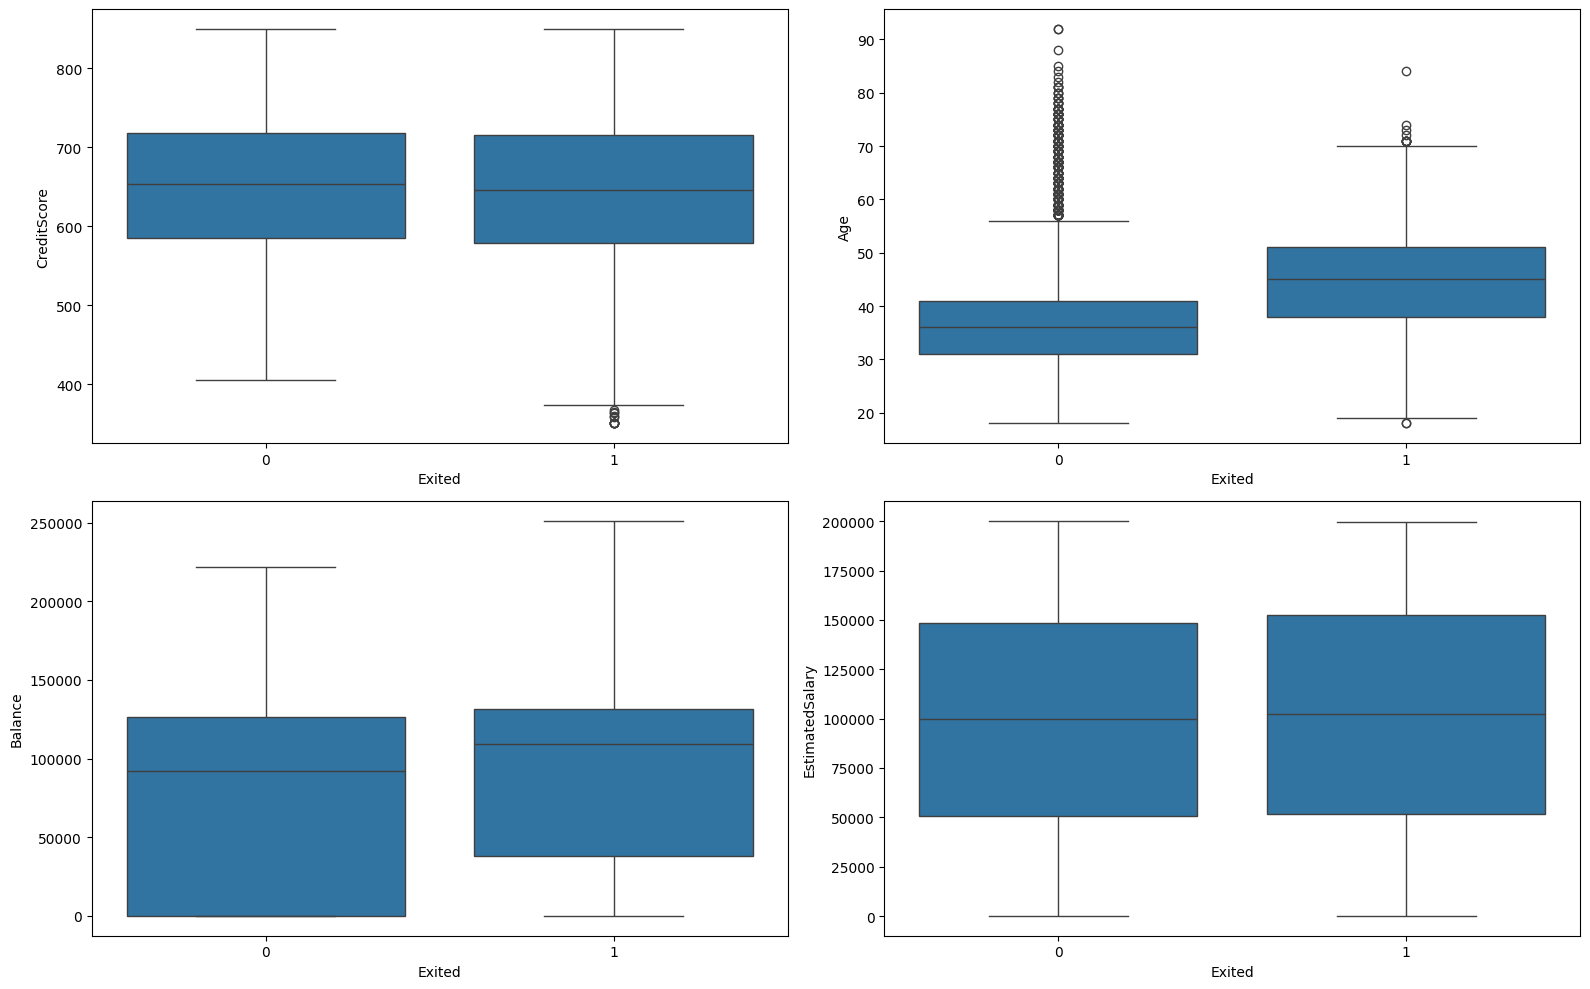

In [25]:
fig, ax = plt.subplots(2,2, figsize = (16,10))
#To get the unique range of credit score
sns.boxplot(x ='Exited',y ='CreditScore',data=dataset,ax = ax[0][0])
#To get the unique range of age
sns.boxplot(x ='Exited',y ='Age',data=dataset,ax = ax[0][1])
#To get the unique range of Balance
sns.boxplot(x ='Exited',y ='Balance',data=dataset,ax = ax[1][0])
#To get the unique range of Estimated Salary
sns.boxplot(x ='Exited',y ='EstimatedSalary',data=dataset,ax = ax[1][1])
plt.tight_layout()
plt.show()

In [26]:
numeric_data = dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset_encoded = dataset.apply(label_encoder.fit_transform)
correlation_matrix = dataset_encoded.corr()

In [31]:
print(dataset.dtypes)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [32]:
for column in dataset.columns:
    try:
        print(dataset[[column]].corr())
    except ValueError as e:
        print(f"Error computing correlation for column {column}: {e}")

             CreditScore
CreditScore          1.0
Error computing correlation for column Geography: could not convert string to float: 'France'
Error computing correlation for column Gender: could not convert string to float: 'Female'
     Age
Age  1.0
        Tenure
Tenure     1.0
         Balance
Balance      1.0
               NumOfProducts
NumOfProducts            1.0
           HasCrCard
HasCrCard        1.0
                IsActiveMember
IsActiveMember             1.0
                 EstimatedSalary
EstimatedSalary              1.0
        Exited
Exited     1.0


In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Geography'] = label_encoder.fit_transform(dataset['Geography'])


In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])


In [35]:
dataset.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


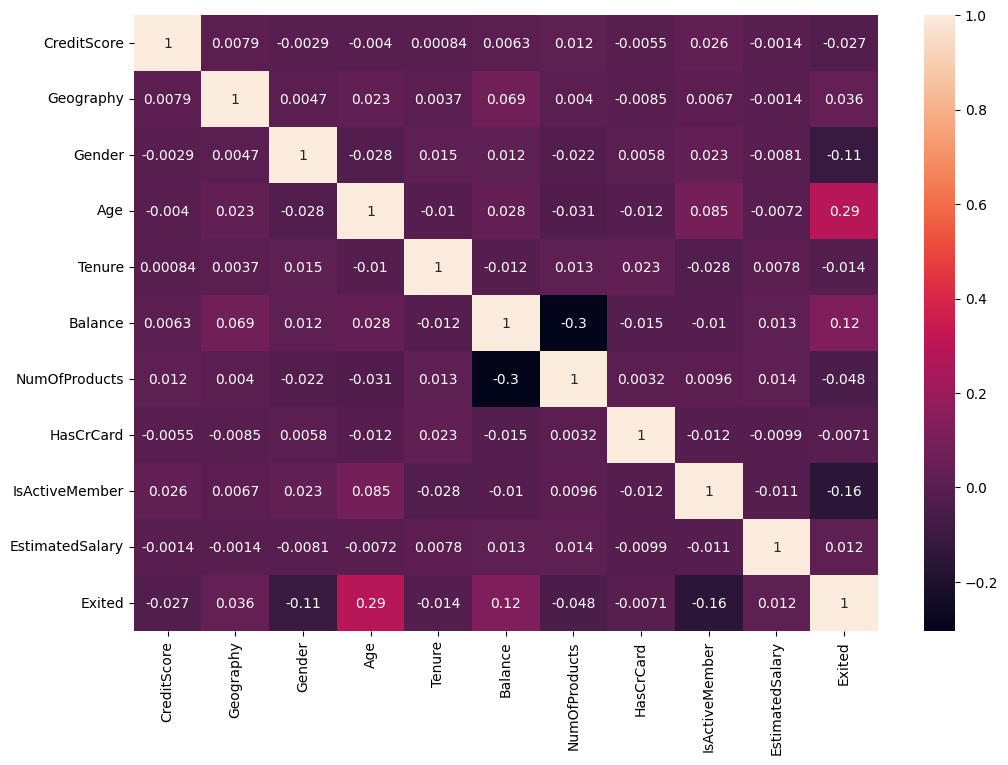

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [37]:
dataset.duplicated().sum()

0

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['Geography','Gender']
for i in lst:
    dataset[i]=le.fit_transform(dataset[i])
    dataset

In [39]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


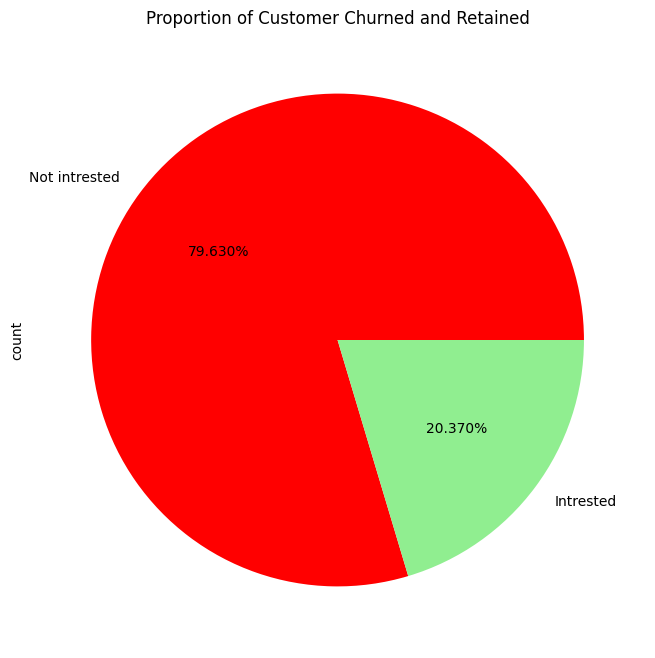

In [40]:
plt.figure(figsize=(8,8))
labels = ['Not intrested','Intrested']
dataset['Exited'].value_counts().plot(kind='pie',labels = labels,autopct='%1.3f%%',colors=['r','#90EE90'])
labels = ['Notintrested','Intrested']
plt.title("Proportion of Customer Churned and Retained")
plt.show()

Step 6:Spilt and seperate the dataframe with x and y

In [41]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [42]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [43]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [44]:
x.shape

(10000, 10)

In [45]:
y.shape

(10000,)

Training and Testing with scaling from the Split Values

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#The data will be trained with 80% and test with random state by training them at 20% 
print("The base size of the trained value is",x_train.shape)
print("The shape size of the tested value of x is",x_test.shape)
print("The shape size of the tested value of y is",y_test.shape)

The base size of the trained value is (8000, 10)
The shape size of the tested value of x is (2000, 10)
The shape size of the tested value of y is (2000,)


In [47]:
#After Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#After getting scaled and getting the appropiate size
x_train.shape,x_test.shape

((8000, 10), (2000, 10))

**Classification of Algorithms** 

The classification of algorithm is done in machine learning with various methods.The few method that are going to discuss as mentioned are :
* Logistic Regression
* Random Forest 
* Gradient Boosting (Alternate Method)
* k-Nearest Neighbors (Bonus)



**1. Logistic Regression**

Logistic regression is a method for analyzing and predicting from a dataset in which there are one or more independent variables that can be used to predict the outcome of a categorical dependent variable such as Yes or No, True or False.

In [48]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(x_train,y_train)
y_predict=classification.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[[1542   53]
 [ 333   72]]


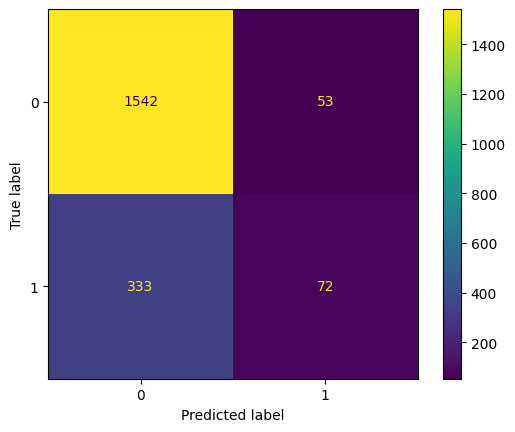

In [49]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

result = confusion_matrix(y_test, y_predict)
print(result)
labels = [0, 1]
cmd = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=labels)
cmd.plot()

In [50]:
#Accurate Score
from sklearn.metrics import accuracy_score
print("The accuracy score is =",accuracy_score(y_test,y_predict)*100)

The accuracy score is = 80.7


In [51]:
#The Classification Report 
from sklearn.metrics import classification_report
print("The classification report is :\n",classification_report(y_test,y_predict))
training_score=classification.score(x_train,y_train)
print("The training score is",training_score)
testing_score=classification.score(x_test,y_test)
print("The testing score is",testing_score)

The classification report is :
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.58      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000

The training score is 0.8085
The testing score is 0.807


**2. Random Forest**

Random Forest Classification is a machine learning model that has collection of decision tree classifiers, each trained on a random subset of the training data, and outputs the mode (most common class) of the classes output by individual trees.

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[1523   72]
 [ 206  199]]


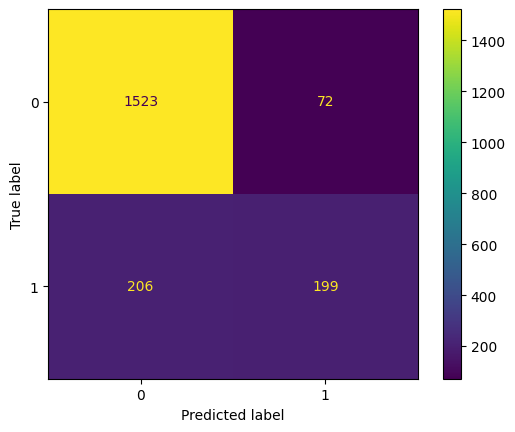

In [54]:
cmd.plot()

In [55]:
#Accurate Score
from sklearn.metrics import accuracy_score
print("The accuracy score is:",accuracy_score(y_test,y_pred)*100)

The accuracy score is: 86.1


In [56]:
#The Classification Report 
from sklearn.metrics import classification_report
print("The classification report is :\n",classification_report(y_test,y_pred))
training_score=rf.score(x_train,y_train)
print("The training score is",training_score)
testing_score=rf.score(x_test,y_test)
print("The testing score is",testing_score)

The classification report is :
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.73      0.49      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

The training score is 1.0
The testing score is 0.861


**3. Gradient Boosting(Optional method)**

Gradient Boosting is a machine learning technique that builds an ensemble of weak prediction models, typically decision trees, in a stage-wise fashion, where each tree corrects the errors of its predecessor, to create a strong predictive model.

Confusion Matrix  is:
[[1527   68]
 [ 203  202]]

The accuracy score is: 86.45

The classification report is:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000


The training score is 0.872

The testing score is 0.8645


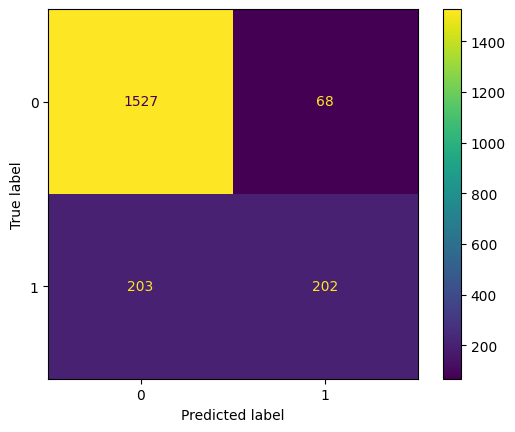

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report


# Create the model
clf = GradientBoostingClassifier()

# Fit the model
clf.fit(x_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the accuracy
acc = accuracy_score(y_test, y_pred)*100

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix  is:")
print(cm)
print("\nThe accuracy score is:", acc)
print("\nThe classification report is:")
print(report)
training_score=clf.score(x_train,y_train)
print("\nThe training score is",training_score)
testing_score=clf.score(x_test,y_test)
print("\nThe testing score is",testing_score)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


**4. k-Nearest Neighbors (Bonus)**

k-Nearest Neighbors (k-NN) is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_predi=classifier.predict(x_test)
y_predi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_predi)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[1496   99]
 [ 232  173]]


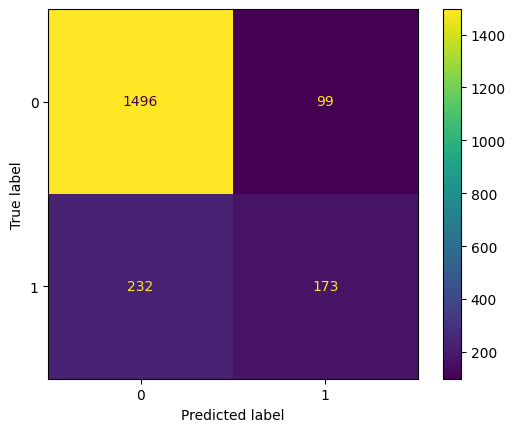

In [60]:
cmd.plot()

In [61]:
from sklearn.metrics import accuracy_score
print("The accuracy score is",accuracy_score(y_test,y_predi)*100)

The accuracy score is 83.45
